### About the dataset

This dataset contains ratings for ten thousand popular books.
Ratings go from one to five.
Both book IDs and user IDs are contiguous. For books, they are 1-10000, for users, 1-53424. All users have made at least two ratings.

There are also books marked to read by the users, book metadata (author, year, etc.) and tags.

- to_read.csv provides IDs of the books marked "to read" by each user, as userid, book_id pairs
- book_tags.csv contains tags(genres) assigned by users to books. Tags in this file are represented by their IDs
- tags.csv translates tag IDs to names
- ratings.csv contains ratings

This dataset contains six million ratings for ten thousand most popular (with most ratings) books. There are also:
- books marked to read by the users
- book metadata (author, year, etc.)
- tags (genres)

Book Metadata:
- Book IDs
- ISBN
- Authors
- Publication Year
- Title (with information on the book’s Saga)
- Original Title (book title only)
- Language
- Rating information
- Average Rating
- Number of Total Ratings
- Number of Ratings per Rating Value (1 - 5)
- Number of Text Reviews
- Image URL

 Objective - To build a Book Recommender System using this dataset which will recommend books to read

Libraries
- Pandas
- Numpy
- Seaborn
- Matplotlib


Visualisations 
- Barplot: performs a comparison of metric values
- Heatmap: helps visualise magnitude
- Histogram: organizes a group of data points into user-specified ranges

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ratings = pd.read_csv('ratings.csv')
books = pd.read_csv('books.csv')
booktags = pd.read_csv('book_tags.csv')
tags = pd.read_csv('tags.csv')

In [3]:
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780000e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780000e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780000e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780000e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780000e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [4]:
ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [5]:
tags.tag_name.value_counts()

-               1
oz              1
p-d-f           1
p-d-eastman     1
p-cornwell      1
               ..
farm-life       1
farm-animals    1
farm            1
farley-mowat    1
ｆａｖｏｕｒｉｔｅｓ      1
Name: tag_name, Length: 34252, dtype: int64

In [6]:
# Since tag IDs and tag names are in different files we will join the csv files of book_tags and tags
Alltags = pd.merge(booktags,tags)

In [7]:
books.shape 

(10006, 23)

23 columns

In [8]:
ratings.shape

(982842, 3)

3 columns

In [9]:
ratings.describe()

,book_id,user_id,rating
count,982842.000000,982842.000000,982842.000000
mean,4948.868366,25652.903206,3.857797
std,2876.538773,15258.671000,0.984131
min,1.000000,1.000000,1.000000
25%,2459.000000,12381.000000,3.000000
50%,4926.000000,25107.000000,4.000000
75%,7422.000000,38629.000000,5.000000
max,10006.000000,58469.000000,5.000000


In [10]:
# Unique values in dataset
ratings.nunique()

book_id    10006
user_id    53978
rating         5
dtype: int64

### Exploratory Data Analysis

In [11]:
# Checking for missing values
ratings.isnull().sum()

book_id    0
user_id    0
rating     0
dtype: int64

In [12]:
ratings.rating.value_counts() # Ratings no.

4    357366
5    294047
3    248623
2     63231
1     19575
Name: rating, dtype: int64

In [13]:
ratings.book_id.value_counts() # Ratings per book

10006    532
10005    220
10002    131
10004    103
5257     100
        ... 
9315      36
1935      34
9486      24
9345      11
7803       8
Name: book_id, Length: 10006, dtype: int64

In [14]:
# Checking for missing values
books.isnull().sum()

id                              0
book_id                         0
best_book_id                    0
work_id                         0
books_count                     0
isbn                          700
isbn13                        585
authors                         0
original_publication_year      21
original_title                585
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
image_url                       0
small_image_url                 0
dtype: int64

#### We observe that books have null values whereas ratings dont

In [15]:
# Removing unneccessary columns from books
books.drop("isbn", axis=1, inplace=True)
books.drop("isbn13",inplace=True, axis=1)
books.drop("image_url",inplace=True, axis=1)
books.drop("small_image_url",inplace=True, axis=1)
books.drop("books_count",inplace=True, axis=1)
books.drop("original_title",inplace=True, axis=1)
books.drop("best_book_id",inplace=True, axis=1)

In [16]:
books.isnull().sum()

id                              0
book_id                         0
work_id                         0
authors                         0
original_publication_year      21
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
dtype: int64

In [17]:
books = books.fillna(books.mode().iloc[0]) # replaced missing values with most occuring values in the column

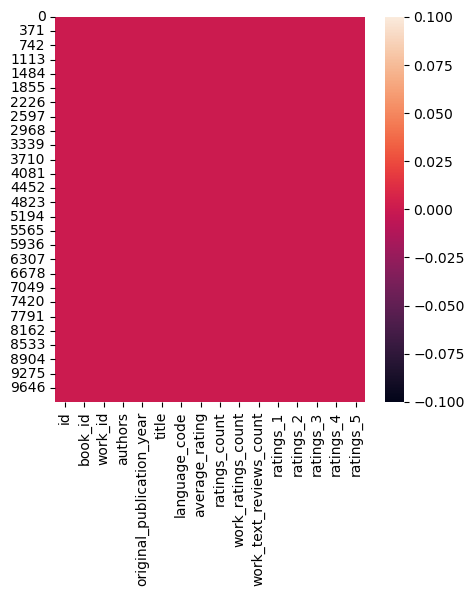

In [18]:
# We cross check after filling the missing values with the most occuring values in the column
plt.figure(figsize=(5,5))
sns.heatmap(books.isnull())
plt.show()

We would have observed white spaces in the heatmap if null values were present. 
Since there are none, that means there are no null values

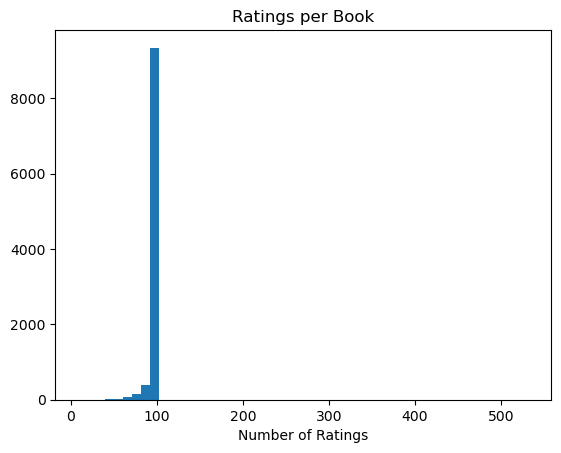

In [19]:
plt.hist(ratings.book_id.value_counts(), bins=50)
plt.title("Ratings per Book")
plt.xlabel("Number of Ratings")
plt.show()

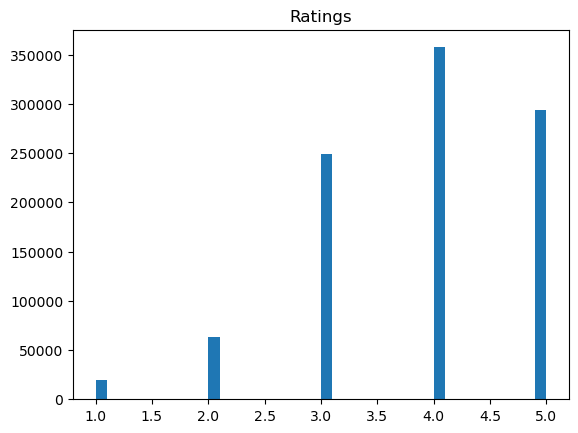

In [20]:
plt.hist(ratings['rating'], bins=40)
plt.title("Ratings")
plt.show()

<Axes: xlabel='book_id', ylabel='average_rating'>

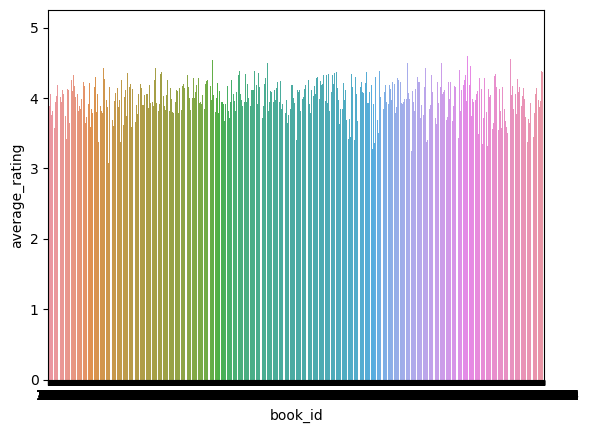

In [21]:
sns.barplot(y="average_rating", x="book_id" , data=books)

In [22]:
# Displaying list of books
i=0
for tn in books['title']:
    print(i,tn)
    i = i + 1    

0 The Hunger Games (The Hunger Games, #1)
1 Harry Potter and the Sorcerer's Stone (Harry Potter, #1)
2 Twilight (Twilight, #1)
3 To Kill a Mockingbird
4 The Great Gatsby
5 The Fault in Our Stars
6 The Hobbit
7 The Catcher in the Rye
8 Angels & Demons  (Robert Langdon, #1)
9 Pride and Prejudice
10 The Kite Runner
11 Divergent (Divergent, #1)
12 1984
13 Animal Farm
14 The Diary of a Young Girl
15 The Girl with the Dragon Tattoo (Millennium, #1)
16 Catching Fire (The Hunger Games, #2)
17 Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)
18 The Fellowship of the Ring (The Lord of the Rings, #1)
19 Mockingjay (The Hunger Games, #3)
20 Harry Potter and the Order of the Phoenix (Harry Potter, #5)
21 The Lovely Bones
22 Harry Potter and the Chamber of Secrets (Harry Potter, #2)
23 Harry Potter and the Goblet of Fire (Harry Potter, #4)
24 Harry Potter and the Deathly Hallows (Harry Potter, #7)
25 The Da Vinci Code (Robert Langdon, #2)
26 Harry Potter and the Half-Blood Prince (Harry P

#### Preparing the data

In [23]:
# Top 10 rated books
toprated = books.sort_values('average_rating', ascending=False)[0:10]

# Top 10 popular books
popular = books.sort_values('ratings_count', ascending=False)[0:10]

In [24]:
print("Top 10 rated books are -")
print("")
for i in toprated['title']:
    print(i)

print("")
print("------------------------------------")
print("")

print("Top 10 popular books are -")
print("")
for j in popular['title']:
    print(j)

Top 10 rated books are -

code complete
Essential Scum
Release it
Design Pattern
Refactoring
Clean Code
The Complete Calvin and Hobbes
Harry Potter Boxed Set, Books 1-5 (Harry Potter, #1-5)
Words of Radiance (The Stormlight Archive, #2)
Mark of the Lion Trilogy

------------------------------------

Top 10 popular books are -

The Hunger Games (The Hunger Games, #1)
Harry Potter and the Sorcerer's Stone (Harry Potter, #1)
Release it
Design Pattern
Refactoring
Clean Code
code complete
Essential Scum
Twilight (Twilight, #1)
To Kill a Mockingbird


In [25]:
# We use merge instead of concat because merge offers flexibility, concat stacks up multiple dataframes
maindf=pd.merge(books,ratings)
maindf.tail()

,id,book_id,work_id,authors,original_publication_year,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,user_id,rating
80228,10000,8914,11817,John Keegan,1998.0,The First World War,eng,4.0,9162,9700,364,117,345,2031,4138,3069,46715,4
80229,10000,8914,11817,John Keegan,1998.0,The First World War,eng,4.0,9162,9700,364,117,345,2031,4138,3069,47073,4
80230,10000,8914,11817,John Keegan,1998.0,The First World War,eng,4.0,9162,9700,364,117,345,2031,4138,3069,49663,3
80231,10000,8914,11817,John Keegan,1998.0,The First World War,eng,4.0,9162,9700,364,117,345,2031,4138,3069,50305,3
80232,10000,8914,11817,John Keegan,1998.0,The First World War,eng,4.0,9162,9700,364,117,345,2031,4138,3069,52244,4


Since both our dataframes books and ratings have no null values therefore maindf wont have null values as well

In [26]:
maindf.shape

(80233, 18)

In [27]:
maindf.info() # getting info on the merged dataframes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80233 entries, 0 to 80232
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         80233 non-null  int64  
 1   book_id                    80233 non-null  int64  
 2   work_id                    80233 non-null  int64  
 3   authors                    80233 non-null  object 
 4   original_publication_year  80233 non-null  float64
 5   title                      80233 non-null  object 
 6   language_code              80233 non-null  object 
 7   average_rating             80233 non-null  float64
 8   ratings_count              80233 non-null  int64  
 9   work_ratings_count         80233 non-null  int64  
 10  work_text_reviews_count    80233 non-null  int64  
 11  ratings_1                  80233 non-null  int64  
 12  ratings_2                  80233 non-null  int64  
 13  ratings_3                  80233 non-null  int

In [28]:
corr_matrix=maindf.corr()

C:\Users\john manohar\AppData\Local\Temp\ipykernel_6576\775814104.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=maindf.corr()


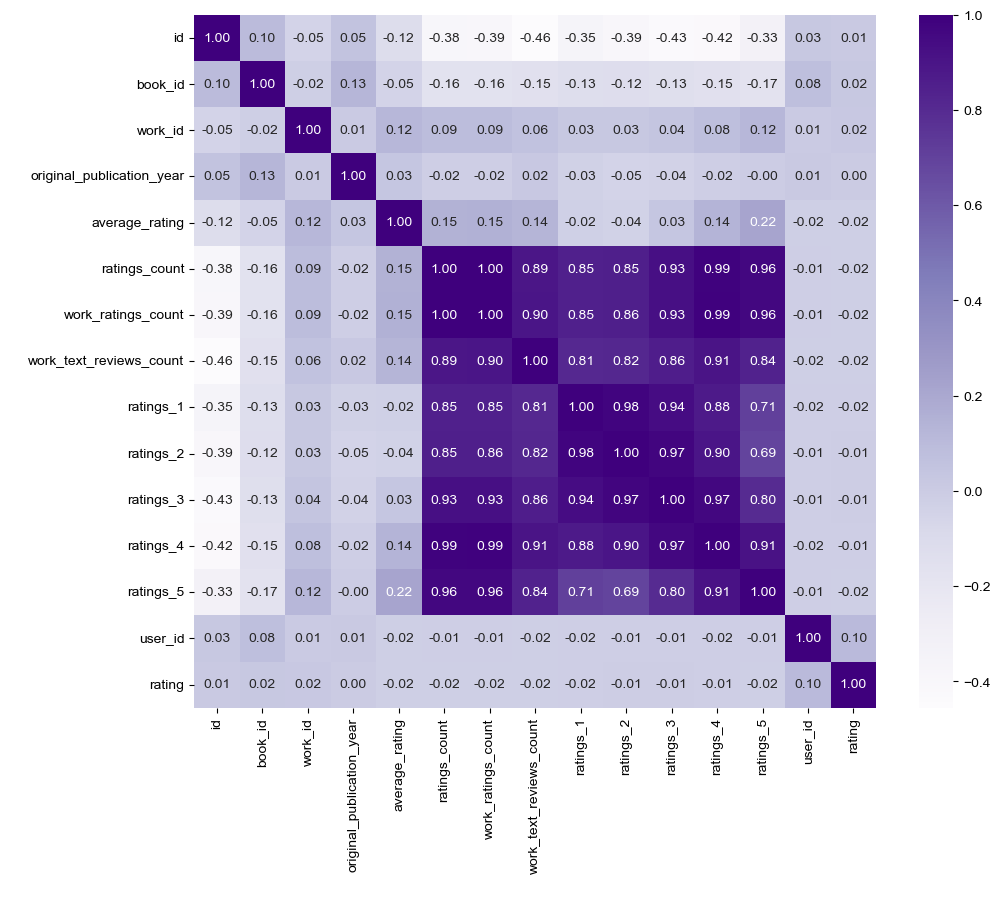

In [29]:
plt.figure(figsize=(11,9))
sns.heatmap(corr_matrix, cmap='Purples', annot=True, fmt=".2f")
sns.set(font_scale=1.5)

We observe some strong correlations

## Content Based Recommendation

In this system, user will enter the ID of the book they like, and will get recommendations on similar content.
Item similarity based system

In [30]:
# Sparse matrix for books and users

from scipy.sparse import coo_matrix

matrix = coo_matrix((maindf['rating'],(maindf['book_id'], maindf['user_id'])))
print(matrix)

  (3, 314)	3
  (3, 588)	1
  (3, 2077)	2
  (3, 2487)	3
  (3, 2900)	3
  (3, 3662)	4
  (3, 4536)	1
  (3, 5115)	4
  (3, 5272)	5
  (3, 5461)	2
  (3, 5885)	4
  (3, 6063)	5
  (3, 6630)	5
  (3, 6634)	3
  (3, 7001)	4
  (3, 9246)	1
  (3, 9731)	2
  (3, 9771)	3
  (3, 10140)	3
  (3, 10246)	1
  (3, 10249)	5
  (3, 10509)	1
  (3, 10610)	1
  (3, 10751)	1
  (3, 10944)	1
  :	:
  (8914, 30322)	4
  (8914, 30554)	3
  (8914, 33033)	3
  (8914, 33090)	5
  (8914, 33277)	4
  (8914, 33928)	3
  (8914, 34333)	4
  (8914, 35115)	5
  (8914, 35566)	5
  (8914, 36909)	3
  (8914, 37525)	4
  (8914, 37831)	3
  (8914, 38305)	4
  (8914, 39001)	3
  (8914, 40307)	4
  (8914, 40696)	3
  (8914, 42073)	3
  (8914, 44361)	2
  (8914, 45695)	4
  (8914, 46317)	3
  (8914, 46715)	4
  (8914, 47073)	4
  (8914, 49663)	3
  (8914, 50305)	3
  (8914, 52244)	4


In [31]:
matrix.shape # shape of the sparse matrix

(10007, 58470)

In [32]:
List = []  # List to maintain a list of dictionaries

# Each dictionary corresponds to a single book
# Both dictionaries take numeric values
Map = {}
revMap = {}
ptr = 0  # pointer

testdf = ratings.copy()  # Copy the dataset for testing
testdf = testdf[['user_id', 'rating']].groupby(testdf['book_id'])

# The user_id is the key, while the rating given by the user for the book is its value (in the dictionary)

for i in testdf.groups.keys():
    temp = {}  # Create a temporary dictionary for iterations
    groupdf = testdf.get_group(i)  # Extract the keys
    for j in range(len(groupdf)):
        temp[groupdf.iloc[j, 0]] = groupdf.iloc[j, 1]
    Map[ptr] = i
    revMap[i] = ptr
    ptr += 1
    List.append(temp)  # Append the dictionary formed in the list

# Convert DataFrameGroupBy objects back to DataFrames
testdf_df = testdf.mean().reset_index()
groupdf_df = groupdf.mean().reset_index()
books_df = books.groupby('book_id').mean().reset_index()  # Apply grouping and aggregation

C:\Users\john manohar\AppData\Local\Temp\ipykernel_6576\485312163.py:27: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  books_df = books.groupby('book_id').mean().reset_index()  # Apply grouping and aggregation


In [33]:
# Save the DataFrames to CSV files
testdf_df.to_csv("testdf.csv", index=False, encoding='utf-8')
groupdf_df.to_csv("groupdf.csv", index=False, encoding='utf-8')
books_df.to_csv("books2.csv", index=False, encoding='utf-8')


In [34]:
Map

{0: 1,
 1: 2,
 2: 3,
 3: 4,
 4: 5,
 5: 6,
 6: 7,
 7: 8,
 8: 9,
 9: 10,
 10: 11,
 11: 12,
 12: 13,
 13: 14,
 14: 15,
 15: 16,
 16: 17,
 17: 18,
 18: 19,
 19: 20,
 20: 21,
 21: 22,
 22: 23,
 23: 24,
 24: 25,
 25: 26,
 26: 27,
 27: 28,
 28: 29,
 29: 30,
 30: 31,
 31: 32,
 32: 33,
 33: 34,
 34: 35,
 35: 36,
 36: 37,
 37: 38,
 38: 39,
 39: 40,
 40: 41,
 41: 42,
 42: 43,
 43: 44,
 44: 45,
 45: 46,
 46: 47,
 47: 48,
 48: 49,
 49: 50,
 50: 51,
 51: 52,
 52: 53,
 53: 54,
 54: 55,
 55: 56,
 56: 57,
 57: 58,
 58: 59,
 59: 60,
 60: 61,
 61: 62,
 62: 63,
 63: 64,
 64: 65,
 65: 66,
 66: 67,
 67: 68,
 68: 69,
 69: 70,
 70: 71,
 71: 72,
 72: 73,
 73: 74,
 74: 75,
 75: 76,
 76: 77,
 77: 78,
 78: 79,
 79: 80,
 80: 81,
 81: 82,
 82: 83,
 83: 84,
 84: 85,
 85: 86,
 86: 87,
 87: 88,
 88: 89,
 89: 90,
 90: 91,
 91: 92,
 92: 93,
 93: 94,
 94: 95,
 95: 96,
 96: 97,
 97: 98,
 98: 99,
 99: 100,
 100: 101,
 101: 102,
 102: 103,
 103: 104,
 104: 105,
 105: 106,
 106: 107,
 107: 108,
 108: 109,
 109: 110,
 110: 11

In [35]:
revMap

{1: 0,
 2: 1,
 3: 2,
 4: 3,
 5: 4,
 6: 5,
 7: 6,
 8: 7,
 9: 8,
 10: 9,
 11: 10,
 12: 11,
 13: 12,
 14: 13,
 15: 14,
 16: 15,
 17: 16,
 18: 17,
 19: 18,
 20: 19,
 21: 20,
 22: 21,
 23: 22,
 24: 23,
 25: 24,
 26: 25,
 27: 26,
 28: 27,
 29: 28,
 30: 29,
 31: 30,
 32: 31,
 33: 32,
 34: 33,
 35: 34,
 36: 35,
 37: 36,
 38: 37,
 39: 38,
 40: 39,
 41: 40,
 42: 41,
 43: 42,
 44: 43,
 45: 44,
 46: 45,
 47: 46,
 48: 47,
 49: 48,
 50: 49,
 51: 50,
 52: 51,
 53: 52,
 54: 53,
 55: 54,
 56: 55,
 57: 56,
 58: 57,
 59: 58,
 60: 59,
 61: 60,
 62: 61,
 63: 62,
 64: 63,
 65: 64,
 66: 65,
 67: 66,
 68: 67,
 69: 68,
 70: 69,
 71: 70,
 72: 71,
 73: 72,
 74: 73,
 75: 74,
 76: 75,
 77: 76,
 78: 77,
 79: 78,
 80: 79,
 81: 80,
 82: 81,
 83: 82,
 84: 83,
 85: 84,
 86: 85,
 87: 86,
 88: 87,
 89: 88,
 90: 89,
 91: 90,
 92: 91,
 93: 92,
 94: 93,
 95: 94,
 96: 95,
 97: 96,
 98: 97,
 99: 98,
 100: 99,
 101: 100,
 102: 101,
 103: 102,
 104: 103,
 105: 104,
 106: 105,
 107: 106,
 108: 107,
 109: 108,
 110: 109,
 111: 11

In [36]:
# Now we use DictVectorizer() function to create vectors corresponding to each book.
# Each point in the vector space represents a book.

from sklearn.feature_extraction import DictVectorizer
dictVectorizer = DictVectorizer(sparse=True)
vector = dictVectorizer.fit_transform(List)
vector

<10006x53978 sparse matrix of type '<class 'numpy.float64'>'
	with 980033 stored elements in Compressed Sparse Row format>

In [37]:
# Computes similarity b/w vector lists

from sklearn.metrics.pairwise import cosine_similarity
cos_similarity = cosine_similarity(vector)
cos_similarity

array([[1.        , 0.55552614, 0.50915226, ..., 0.        , 0.        ,
        0.        ],
       [0.55552614, 1.        , 0.52021603, ..., 0.        , 0.        ,
        0.        ],
       [0.50915226, 0.52021603, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.06741999],
       [0.        , 0.        , 0.        , ..., 0.        , 0.06741999,
        1.        ]])

We observe that it is a 2D matrix

Visualising the 2D Matrix

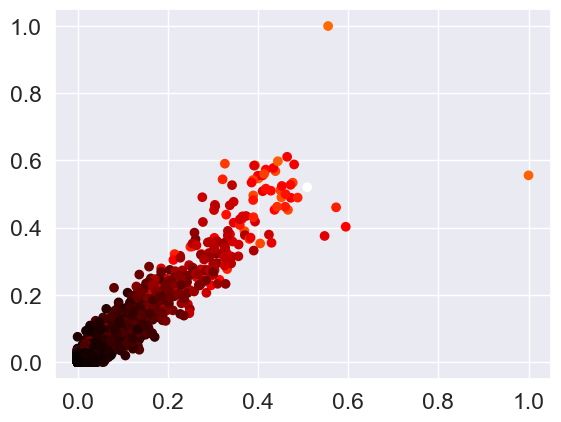

In [38]:
plt.scatter(cos_similarity[:, 0], cos_similarity[:, 1], c=cos_similarity[:, 2], cmap='hot')
plt.show()

In [39]:
# Defining functions for the recommender system 
def printDetails(bookID):
    
    print("Title:", books[books['id']==bookID]['title'].values[0])
    print("Author:",books[books['id']==bookID]['authors'].values[0])
    print("Publication Year:",books[books['id']==bookID]['original_publication_year'].values[0])
    print("Language:",books[books['id']==bookID]['language_code'].values[0])
    print("Book ID:",books[books['id']==bookID]['id'].values[0])
    print(" ")

# Function argsort(), returns the indices which would sort an array. Used with 2D arrays also.
# Cos_similarity is a 2D matrix which we will use here
def getRecommandations(bookID):
    r = revMap[bookID]
    argsort = np.argsort(cos_similarity[r])
    
    print(" ")
    print("+----------------------+")
    print("Books you might like")
    print("+----------------------+")
    print(" ")
    
    for i in argsort[-10:][:]:
        printDetails(Map[i])
        
# Displays popular books to new users to start from
def newRecommandations():
    
    print("")
    print("+-------------------------------+")
    print("Popular books to start from")
    print("+-------------------------------+")
    
    for j in popular['title']:
        print(j)

In [40]:
books['id']

0            1
1            2
2            3
3            4
4            5
         ...  
10001    10002
10002    10003
10003    10004
10004    10005
10005    10006
Name: id, Length: 10006, dtype: int64

In [42]:
# Input from user

yynn = input("Are you a new user? ")
if (yynn=="Yes")or(yynn=="yes")or(yynn=="y")or(yynn=="Y"):
    newRecommandations()

else:
    bookID = int(input("Enter the ID of your favourite book to get recommendations:- "))
    getRecommandations(bookID)

Are you a new user? yes

+-------------------------------+
Popular books to start from
+-------------------------------+
The Hunger Games (The Hunger Games, #1)
Harry Potter and the Sorcerer's Stone (Harry Potter, #1)
Release it
Design Pattern
Refactoring
Clean Code
code complete
Essential Scum
Twilight (Twilight, #1)
To Kill a Mockingbird


Top 10 recommnedations